## Sentiment of Routine

In [49]:
import pandas as pd

data = pd.read_pickle('new pickle/corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jack,"Look. Jack! Jack! Jack, can you sign this for ...",Jack Whitehall
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan


In [50]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias,0.112966,0.475079
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jack,"Look. Jack! Jack! Jack, can you sign this for ...",Jack Whitehall,0.028288,0.538657
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628


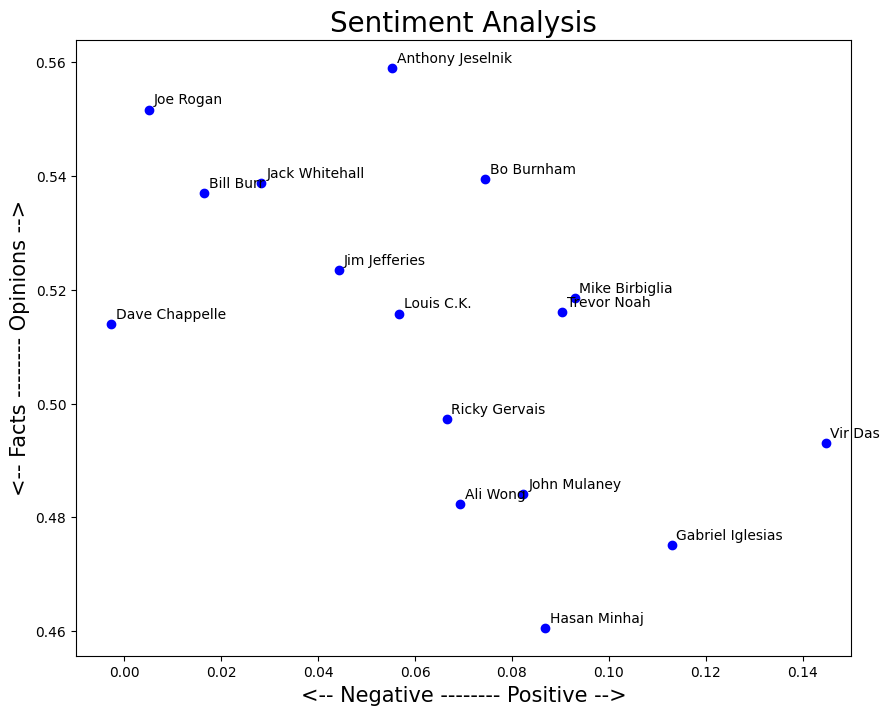

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .15) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time (N = 10)

In [52]:
import numpy as np
import math

def split_text(text, n=10):

    length = len(text)

    size = math.floor(length / n)

    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [53]:
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
gabriel,[man] Can you please state your name? Martin M...,Gabriel Iglesias,0.112966,0.475079
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jack,"Look. Jack! Jack! Jack, can you sign this for ...",Jack Whitehall,0.028288,0.538657
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628


In [54]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [55]:
len(list_pieces)

16

In [56]:
len(list_pieces[0])

10

### Polarity

In [57]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
len(polarity_transcript)

16

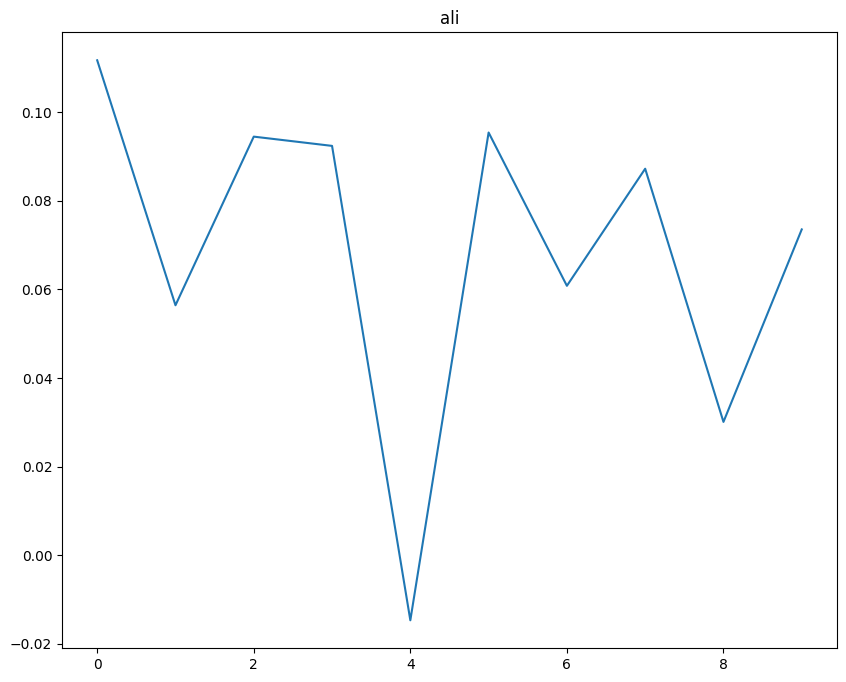

In [58]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

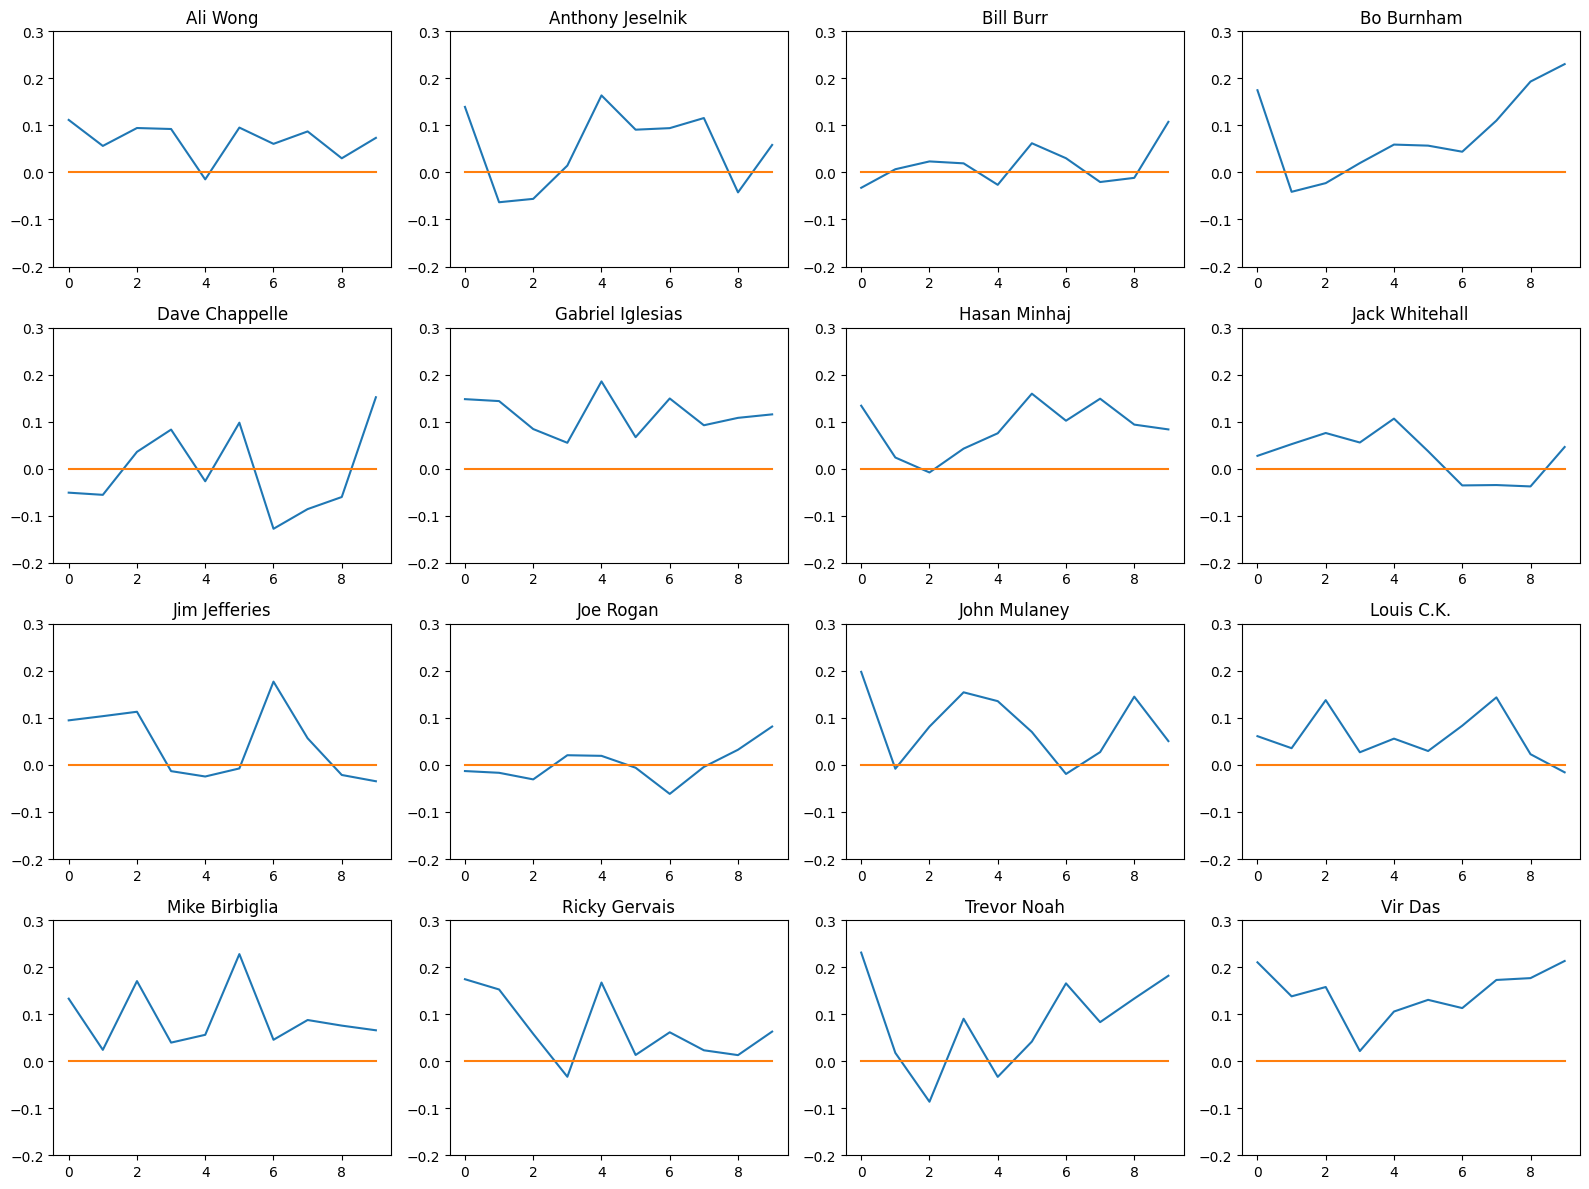

In [59]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):   

    plt.subplot(4, 4, index+1)

    plt.plot(polarity_transcript[index])

    plt.plot(np.arange(0,10), np.zeros(10))

    plt.title(data['full_name'][index])
    
    plt.ylim(ymin = -.2, ymax = .3)
    
plt.tight_layout()
plt.show()

### Findings

* **Ali Wong** - She used some less negative words (as she used 's-words' in her show), overall her 'Comedy' is clean.

* **Anthony Jeselnik** - He used some negative words in starting and last because he does 'Dark Comedy', talks on dark subjects.

* **Bill Burr** - Overall he uses many negative words as he is seen using a lot of 'f-words'.

* **Bo Burnham** - He used very less negative words, overalp comedy is 'Clean' as he does 'Music Comedy'.

* **Dave Chappelle** - Lot of negative words used, he talks on 'Dark' subjects and speaks 'f and s words' a lot.

* **Gabriel Iglesias** - He is 'Story-telling' comedians, does 'Clean' comedy.

* **Hasan Minhaj** - Anecdote(Story-telling) comedians, used very less negative words.

* **Jack WhiteHall** - Overall Clean, does 'Observation' comedy

* **Jim Jefferies** - Used less negative words, talked on 'women' a lot.

* **Joe Rogan** - Used negative words through-out the show, he does 'Observation' as well as 'Political' comedy.

* **John Mullaney** - 'Story-telling' comedy. does 'Clean' comedy

* **Louis C.K.** - Overall Comedy is 'Clean'

* **Mike Birbiglia** - Not used 'f-word or s-word', 'Clean' comedy.

* **Ricky Gervais** - Overall Comedy is 'Clean', use negative words in starting, talked on 'Dark' Subjects.

* **Trevor Noah** - He is 'Political' comedian, he used many negative words.

* **Vir Das** - 'Observation' comedian, does 'Clean' comedy.

### Subjectivity

In [60]:
subjectivity_transcript = []
for lp in list_pieces:
    subj_piece = []
    for p in lp:
        subj_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subj_piece)
    
subjectivity_transcript

[[0.5742130750605327,
  0.4329195011337868,
  0.3756474938460233,
  0.49127128427128447,
  0.4455966064586755,
  0.5150857852129038,
  0.4975687458081823,
  0.5288513321995466,
  0.508007774538387,
  0.4836550836550836],
 [0.5667857142857141,
  0.6001299264971139,
  0.61996151996152,
  0.636940836940837,
  0.4561737980216241,
  0.5675082101806241,
  0.4586024844720497,
  0.6545190316929447,
  0.5321902891347337,
  0.4971196338383838],
 [0.6534959881388449,
  0.42468003718003716,
  0.5389010404799877,
  0.5885652958152955,
  0.5258335519699155,
  0.5328199404761906,
  0.5519151138716354,
  0.5296811945117029,
  0.4931190476190477,
  0.5480937546358106],
 [0.5753331244778614,
  0.651449692780338,
  0.5401930501930503,
  0.40871392496392467,
  0.5242345977939197,
  0.522715934858792,
  0.591147741147741,
  0.6037876668785761,
  0.5803150553150556,
  0.4982281284606866],
 [0.5224262240107311,
  0.46909695696460413,
  0.49236726874657905,
  0.5054730143045358,
  0.5005335692835695,
  0.5121

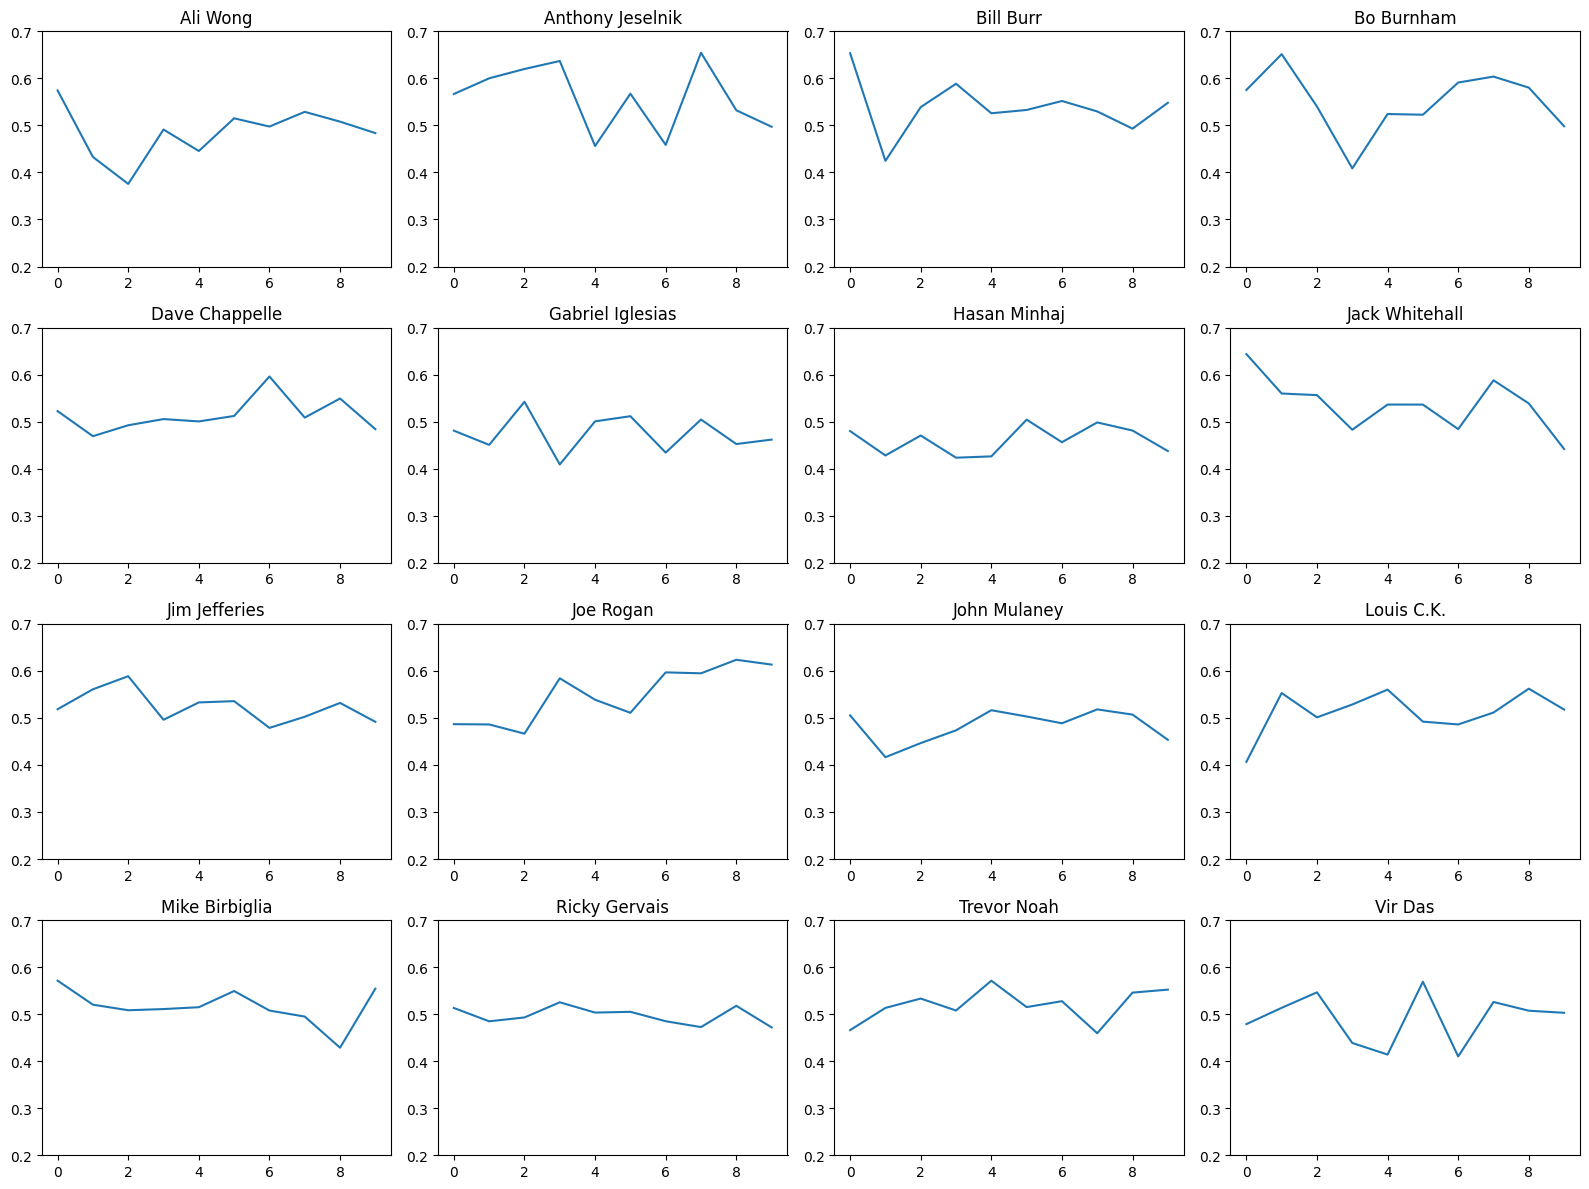

In [61]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):   

    plt.subplot(4, 4, index+1)

    plt.plot(subjectivity_transcript[index])

    # plt.plot(np.arange(0,10), np.zeros(10))

    plt.title(data['full_name'][index])
    
    plt.ylim(ymin = 0.2, ymax = 0.7)
    
plt.tight_layout()
plt.show()

### Findings

* **Ali Wong** - She talks on relationships more, overall her comedy' is 'Opinionated'.

* **Anthony Jeselnik** - He does 'Dark Comedy', talks on dark subjects, 'Opinionated'.

* **Bill Burr** - Overall talks about his own 'Opinions'

* **Bo Burnham** - He does 'Music Comedy', does not talks on 'Facts'.

* **Dave Chappelle** - He talks on 'Dark' subjects, 'Opinionated'.

* **Gabriel Iglesias** - He is 'Story-telling' comedians, does not talks on 'Facts'.

* **Hasan Minhaj** - Anecdote(Story-telling) comedians, does not talks on 'Facts'.

* **Jack WhiteHall** - Overall Clean, does 'Observation' comedy, does not talks on 'Facts' very often.

* **Jim Jefferies** - Talked on 'women' a lot, focus on his own 'Opinions'.

* **Joe Rogan** - He does 'Observation' as well as 'Political' comedy but talks on his own 'Opinions'.

* **John Mullaney** - 'Story-telling' comedy, overall 'Opinionated'.

* **Louis C.K.** - Overall Comedy is 'Opinionated'

* **Mike Birbiglia** - 'Clean' comedy, mix of 'Opinions' and 'Facts'.

* **Ricky Gervais** - mix of 'Opinions' and 'Facts, talked on 'Dark' Subjects.

* **Trevor Noah** - He is 'Political' comedian, mix of 'Opinions' and 'Facts.

* **Vir Das** - 'Observation' comedian, overall talked on 'Facts' as he is seen talking on the Covid Pandemic. 

## Sentiment of Routine Over Time (N = 20)

In [62]:
import numpy as np
import math

def split_text(text, n = 20):

    length = len(text)

    size = math.floor(length / n)

    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [63]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [69]:
len(list_pieces)

16

### Polarity

In [65]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18230030721966203,
  0.0335034013605442,
  0.09856398809523811,
  0.02090643274853801,
  0.11037581699346405,
  0.07853800611153554,
  0.039282694962042786,
  0.13052455357142856,
  0.018840579710144918,
  -0.03669387755102041,
  0.03333474251443002,
  0.1858715503246753,
  0.08565315315315315,
  0.03374793099057805,
  0.0769073220686124,
  0.1,
  0.04222810111699003,
  0.015192550505050527,
  0.024843358395989994,
  0.12490079365079367],
 [0.2678294552669553,
  -0.0016941391941391866,
  -0.033207792207792214,
  -0.08264652014652014,
  -0.1334353741496599,
  0.05546957671957671,
  0.13125000000000003,
  -0.05312805474095798,
  0.11977124183006535,
  0.2065182436611008,
  0.008928571428571414,
  0.17289819376026275,
  0.178125,
  0.029642857142857137,
  0.08748677248677247,
  0.15242272347535502,
  -0.20135438233264324,
  0.0755585812037425,
  0.01940836940836938,
  0.14585738335738338],
 [0.01614895152129194,
  -0.0847041847041847,
  -0.01004088504088504,
  0.03156325156325156,
  -

In [70]:
len(polarity_transcript)

16

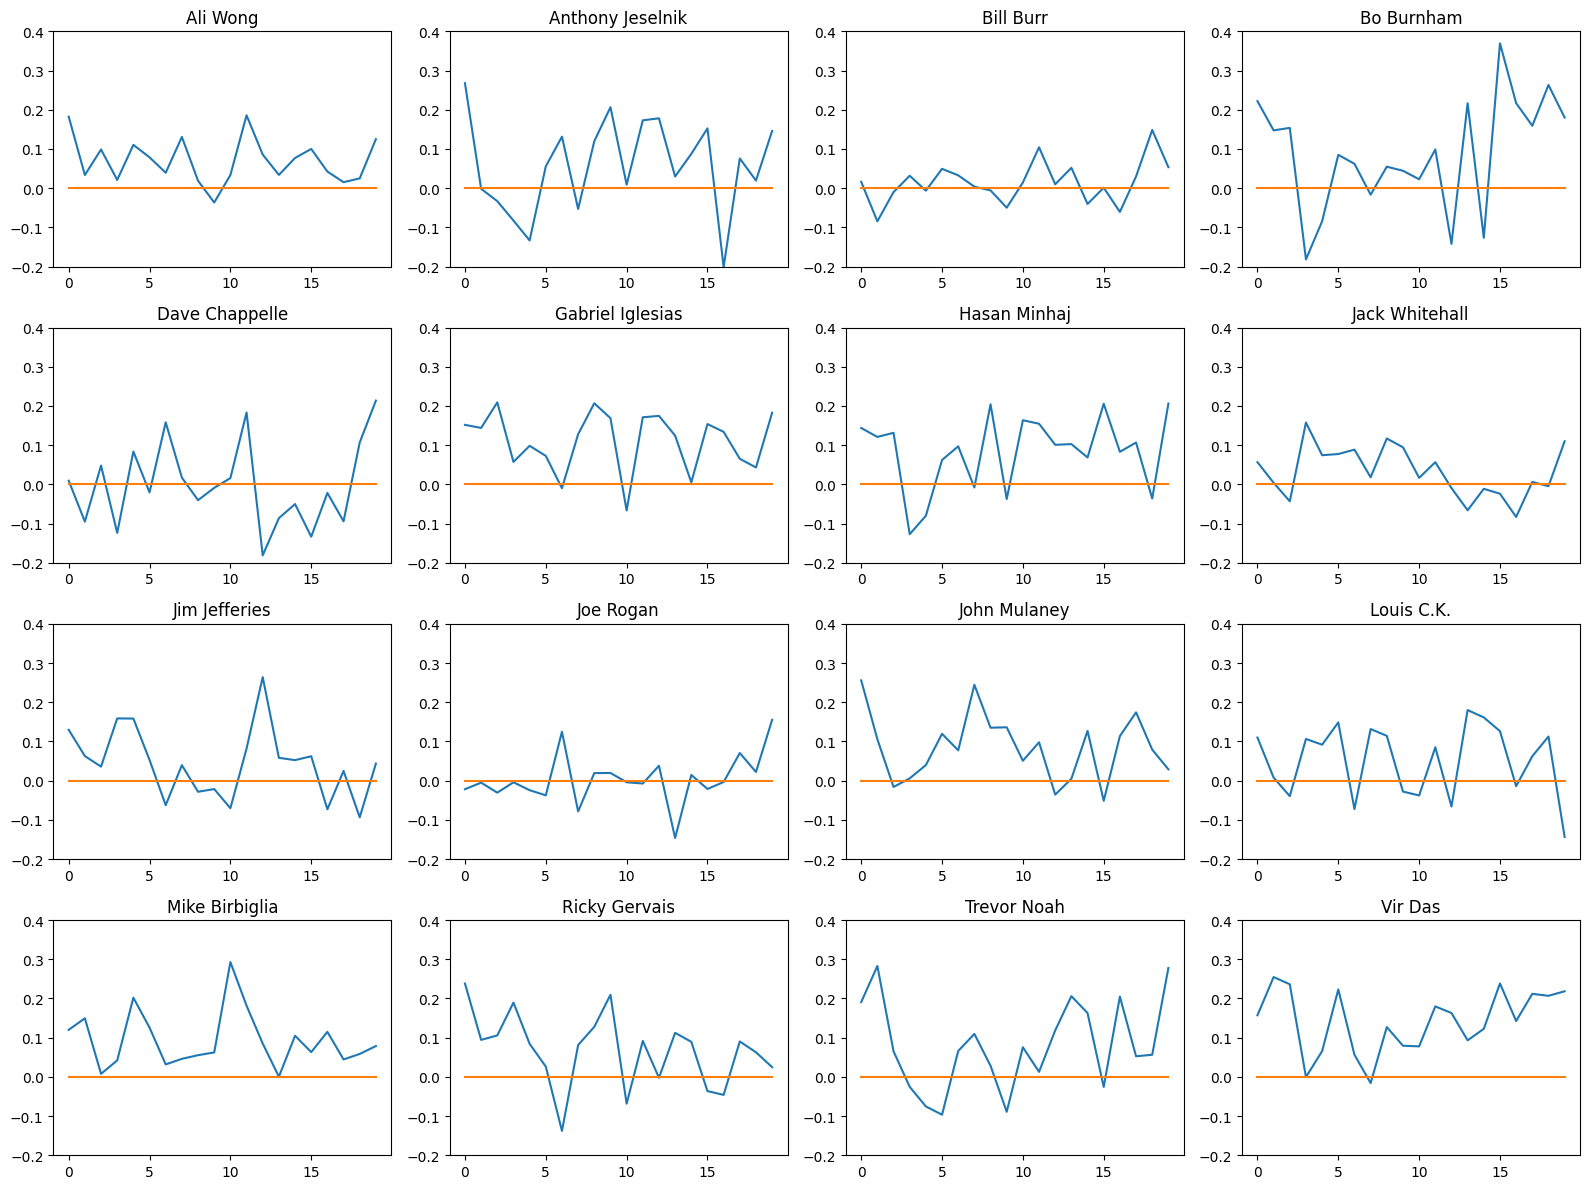

In [77]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):   

    plt.subplot(4, 4, index+1)

    plt.plot(polarity_transcript[index])

    plt.plot(np.arange(0,20), np.zeros(20))

    plt.title(data['full_name'][index])
    
    # plt.xlim(xmax = 20)
    plt.ylim(ymin = -0.2, ymax = 0.4)
    
plt.tight_layout()
plt.show()

### Findings

* **Ali Wong** - She used some less negative words (as she used 's-words' in her show), overall her 'Comedy' is clean.

* **Anthony Jeselnik** - He used negative word because he does 'Dark Comedy', talks on dark subjects.

* **Bill Burr** - Overall he uses many negative words as he is seen using a lot of 'f-words'.

* **Bo Burnham** - He used very negative words, He does 'Music Comedy'.

* **Dave Chappelle** - Lot of negative words used, he talks on 'Dark' subjects and speaks 'f and s words' a lot.

* **Gabriel Iglesias** - He is 'Story-telling' comedians, does 'Clean' comedy.

* **Hasan Minhaj** - Anecdote(Story-telling) comedians, used very less negative words.

* **Jack WhiteHall** - Overall Clean, does 'Observation' comedy, uses some negative words.

* **Jim Jefferies** - Used mix of negative & positive words, talked on 'women' a lot.

* **Joe Rogan** - Used negative words through-out the show, he does 'Observation' as well as 'Political' comedy.

* **John Mullaney** - 'Story-telling' comedy. does 'Clean' comedy.

* **Louis C.K.** - Used negative words, 'Dark' Comedian.

* **Mike Birbiglia** - Not used 'f-word or s-word', 'Clean' comedy.

* **Ricky Gervais** - Overall Comedy is 'Clean', use negative words in starting, talked on 'Dark' Subjects.

* **Trevor Noah** - He is 'Political' comedian, he used negative words.

* **Vir Das** - 'Observation' comedian, does 'Clean' comedy.

### Subjectivity

In [78]:
subjectivity_transcript = []
for lp in list_pieces:
    subj_piece = []
    for p in lp:
        subj_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subj_piece)
    
subjectivity_transcript

[[0.6480798771121351,
  0.4924319727891157,
  0.42598586309523817,
  0.43875835421888054,
  0.339624183006536,
  0.41167080468551054,
  0.43813319530710837,
  0.5294642857142858,
  0.4462560386473431,
  0.4451632653061224,
  0.5311219336219336,
  0.49169973544973544,
  0.555855855855856,
  0.43413865546218494,
  0.4212045570916539,
  0.6623333333333334,
  0.5134626690182246,
  0.5013131313131314,
  0.5189223057644109,
  0.44642857142857145],
 [0.5502579365079365,
  0.5854497354497356,
  0.6661659451659452,
  0.5577991452991452,
  0.7138095238095238,
  0.5089153439153439,
  0.673148148148148,
  0.6159172368849787,
  0.4513071895424837,
  0.4609013605442178,
  0.5809113300492613,
  0.5541050903119868,
  0.35416666666666663,
  0.538937728937729,
  0.6595950345950347,
  0.6473057644110276,
  0.5903554175293307,
  0.4890355164548713,
  0.5467712842712843,
  0.44295935545935533],
 [0.6868177980412022,
  0.6179022366522366,
  0.4026274651274651,
  0.4570238095238095,
  0.6096672897809262,
  0

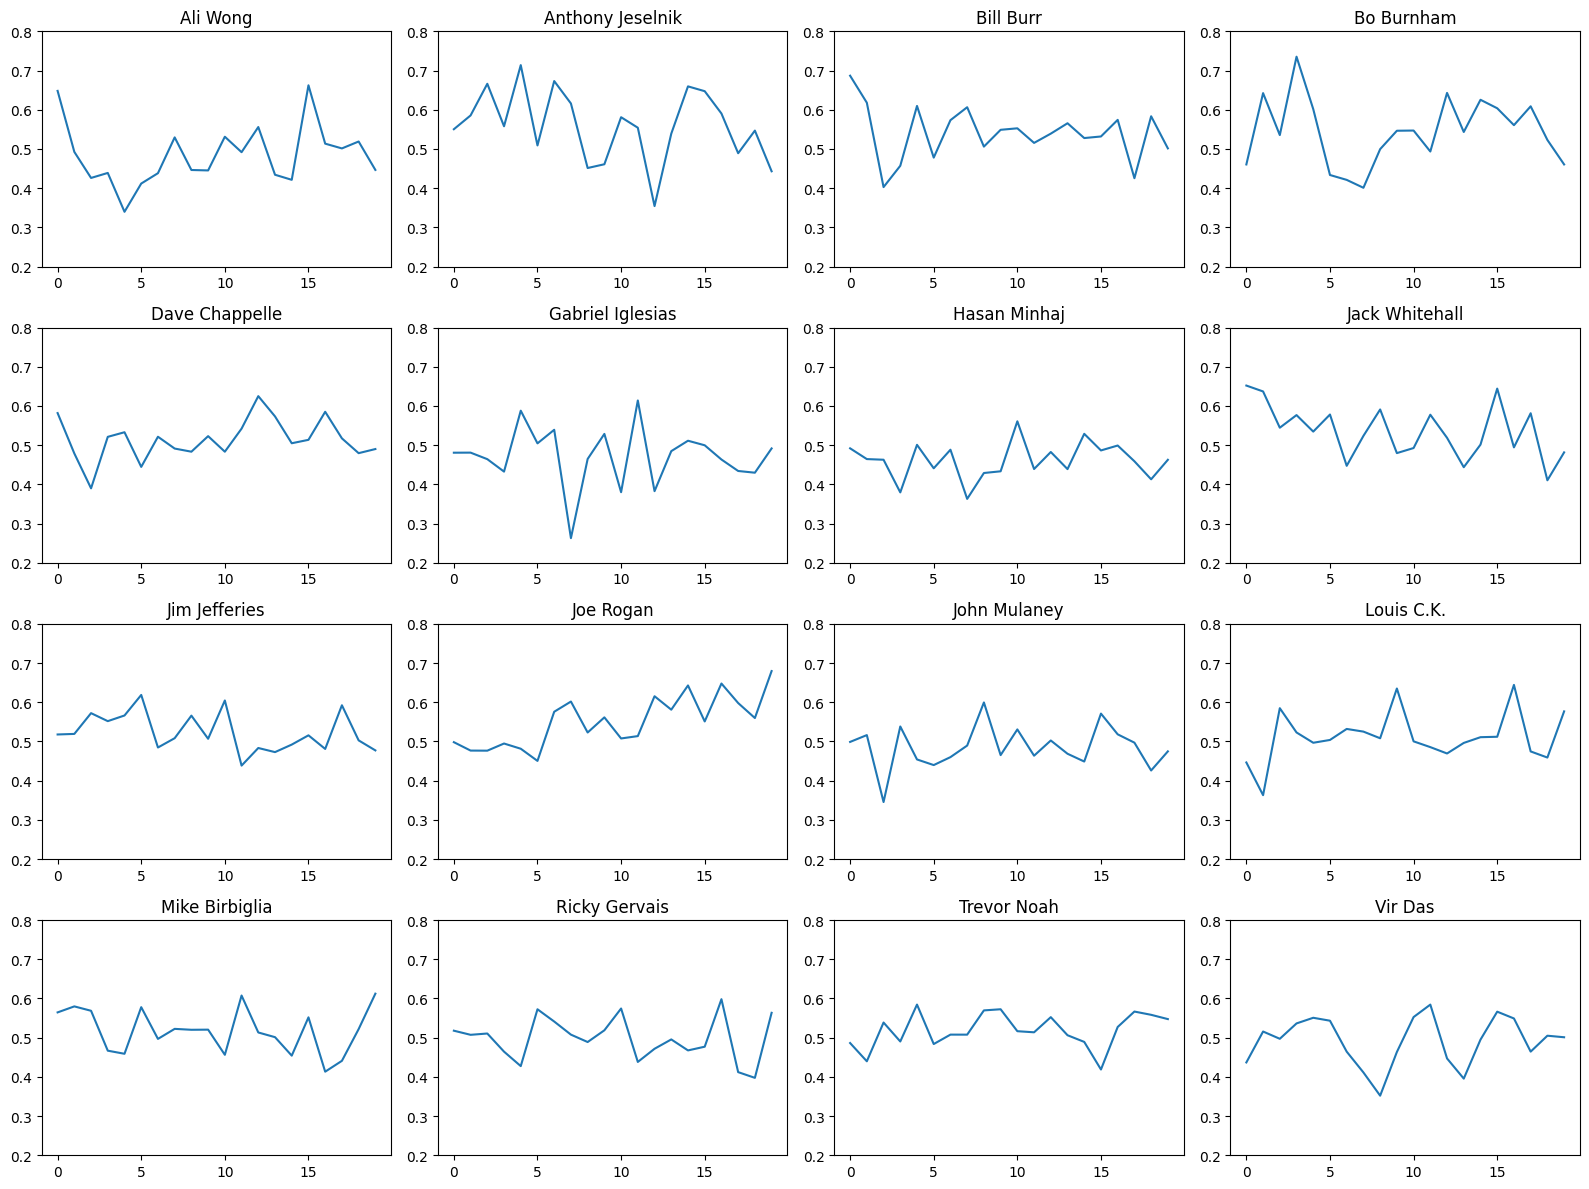

In [83]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):   

    plt.subplot(4, 4, index+1)

    plt.plot(subjectivity_transcript[index])

    # plt.plot(np.arange(0,10), np.zeros(10))

    plt.title(data['full_name'][index])
    
    plt.ylim(ymin = 0.2, ymax = 0.8)
    
plt.tight_layout()
plt.show()

### Findings

* **Ali Wong** - She talks on relationships more, overall her comedy' is 'Opinionated', very less on 'Facts'.

* **Anthony Jeselnik** - He does 'Dark Comedy', talks on dark subjects, 'Opinionated', somewhere talks on 'Facts'.

* **Bill Burr** - Overall talks about his own 'Opinions'

* **Bo Burnham** - He does 'Music Comedy', does not talks on 'Facts'.

* **Dave Chappelle** - He talks on 'Dark' subjects, 'Opinionated'.

* **Gabriel Iglesias** - He is 'Story-telling' comedians, talks on 'Facts' more.

* **Hasan Minhaj** - Anecdote(Story-telling) comedians, mix of 'Facts' & 'Opinions'.

* **Jack WhiteHall** - Overall Clean, does 'Observation' comedy, does not talks on 'Facts' very often.

* **Jim Jefferies** - Talked on 'women' a lot, focus on his own 'Opinions'.

* **Joe Rogan** - He does 'Observation' as well as 'Political' comedy but talks on his own 'Opinions'.

* **John Mullaney** - 'Story-telling' comedy, overall 'Opinionated' and talked on 'Facts' in starting.

* **Louis C.K.** - Overall Comedy is 'Opinionated'

* **Mike Birbiglia** - 'Clean' comedy, mix of 'Opinions' and 'Facts'.

* **Ricky Gervais** - mix of 'Opinions' and 'Facts, talked on 'Dark' Subjects.

* **Trevor Noah** - He is 'Political' comedian, mix of 'Opinions' and 'Facts.

* **Vir Das** - 'Observation' comedian, overall talked on 'Facts' as he is seen talking on the Covid Pandemic. 